In [164]:
%load_ext autoreload
%autoreload 2

from setup import setup_project_env
setup_project_env('~/weatherpy-work')

import xarray as xr
import numpy as np
import pandas as pd

from reanalysis import ncep_r1

%matplotlib inline
import matplotlib.pyplot as plt

import multiprocessing as mp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def load(product, ismean):
    if ismean:
        return ncep_r1.dailyavg_ltm(product, params)
    else:
        return ncep_r1.dailyavg(product, params)

# Is the jet stream increasing or decreasing in speed / meridonalness?

In [101]:
params = {
    'pressure_level': 250,
    'year': range(1979, 2019),
    'area': '55/180/25/240'
}
        
pool = mp.Pool(4)
uwind, vwind, uwind_mean, vwind_mean = pool.starmap(load, [
    ['pressure/uwnd', False], 
    ['pressure/vwnd', False],
    ['pressure/uwnd', True],
    ['pressure/vwnd', True]
])

/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWar

Creating long-term mean timeseries of pressure/uwnd.day
Creating long-term mean timeseries of pressure/vwnd.day
Combining data from years for pressure/uwnd
Combining data from years for pressure/vwnd


In [102]:
uwind_anom = uwind - uwind_mean
vwind_anom = vwind - vwind_mean

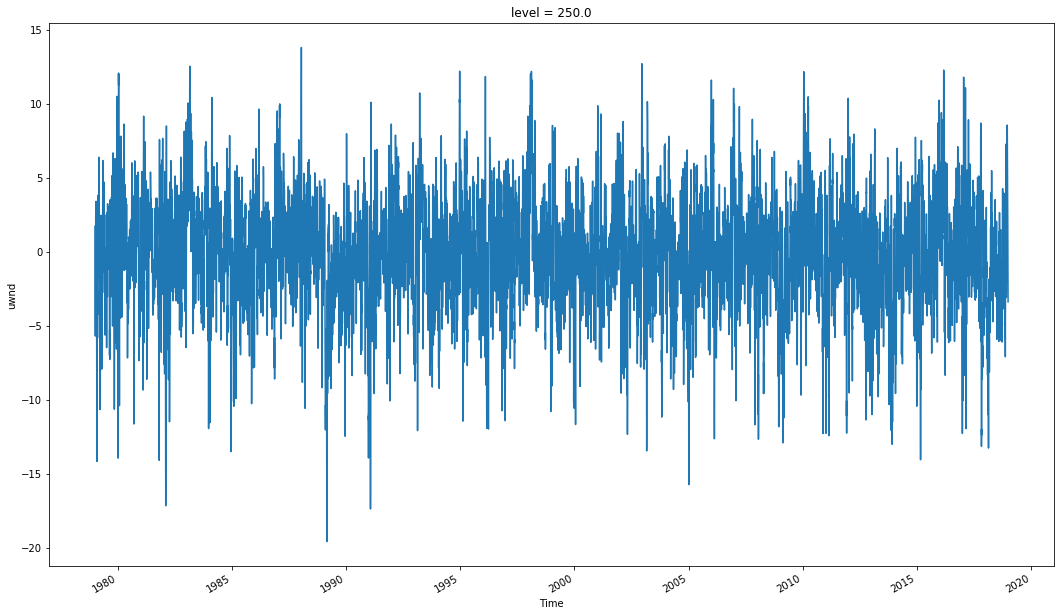

In [103]:
plt.figure(figsize=(18, 10))
uwind_anom.mean(['lon', 'lat']).uwnd.plot()

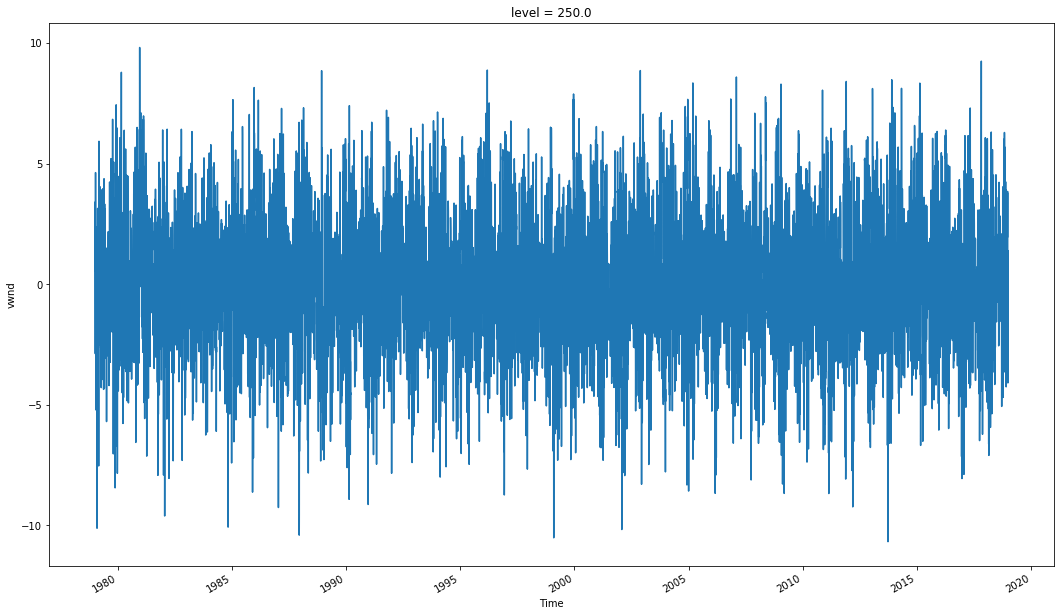

In [104]:
plt.figure(figsize=(18, 10))
vwind_anom.mean(['lon', 'lat']).vwnd.plot()

In [143]:
total_wind = uwind.uwnd ** 2 + vwind.vwnd ** 2

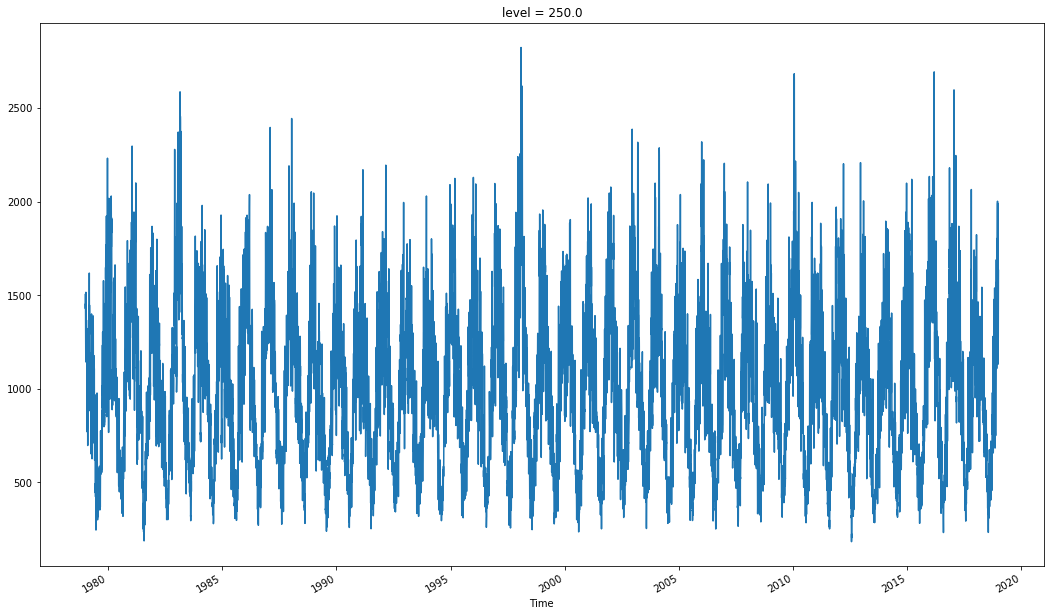

In [144]:
plt.figure(figsize=(18, 10))
total_wind.mean(['lon', 'lat']).plot()

## FFT (v-wind component)

(0, 6)

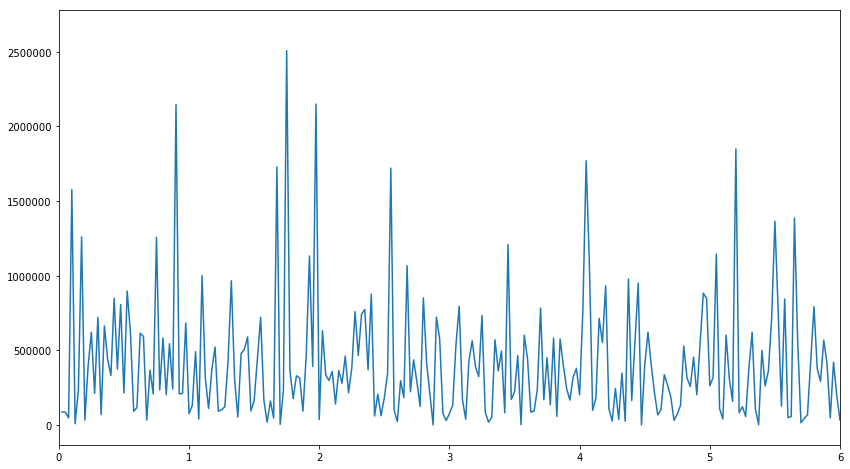

In [165]:
sample_freq, power = vwind_anom.mean(['lon', 'lat']).fft.power_spectrum('vwnd', 1/365)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.plot(sample_freq, power)
ax.set_xlim(0, 6)

# Analysis in the Alaska domain

In [56]:
params = {
    'pressure_level': [250, 500],
    'year': range(1979, 2019),
    'area': '70/190/40/230'
}
    
pool = mp.Pool(2)
hgt, hgt_mean = pool.starmap(load, [
    ['pressure/hgt', False], 
    ['pressure/hgt', True],
])

/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Creating long-term mean timeseries of pressure/hgt.day
Combining data from years for pressure/hgt


In [57]:
hgt_anom = hgt - hgt_mean

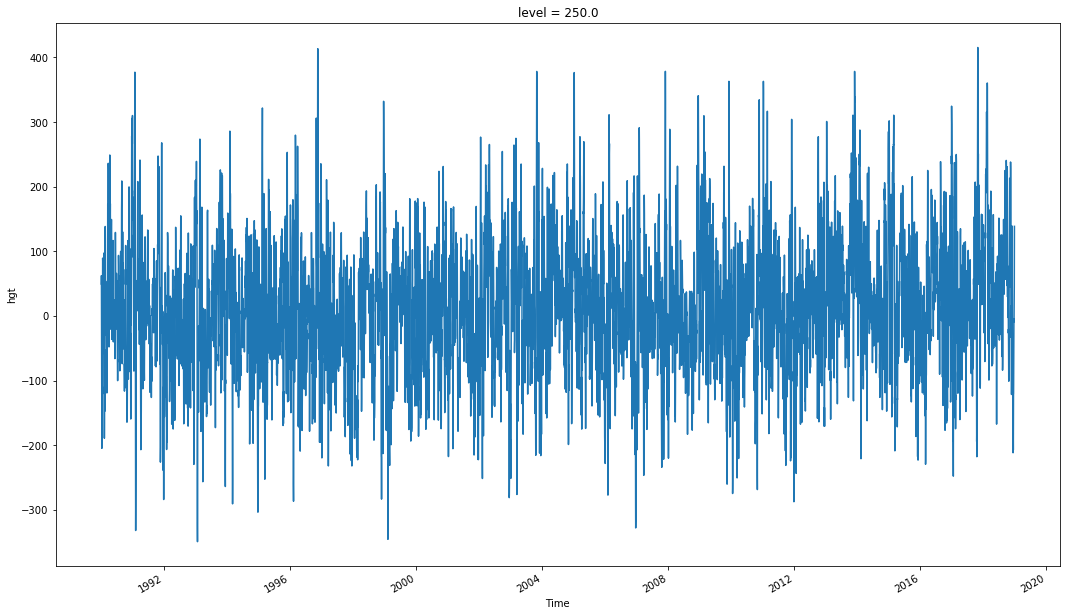

In [60]:
plt.figure(figsize=(18, 10))
hgt_anom.mean(['lon', 'lat']).sel(level=250, time=np.in1d(hgt_anom['time.year'], range(1990, 2019))).hgt.plot()

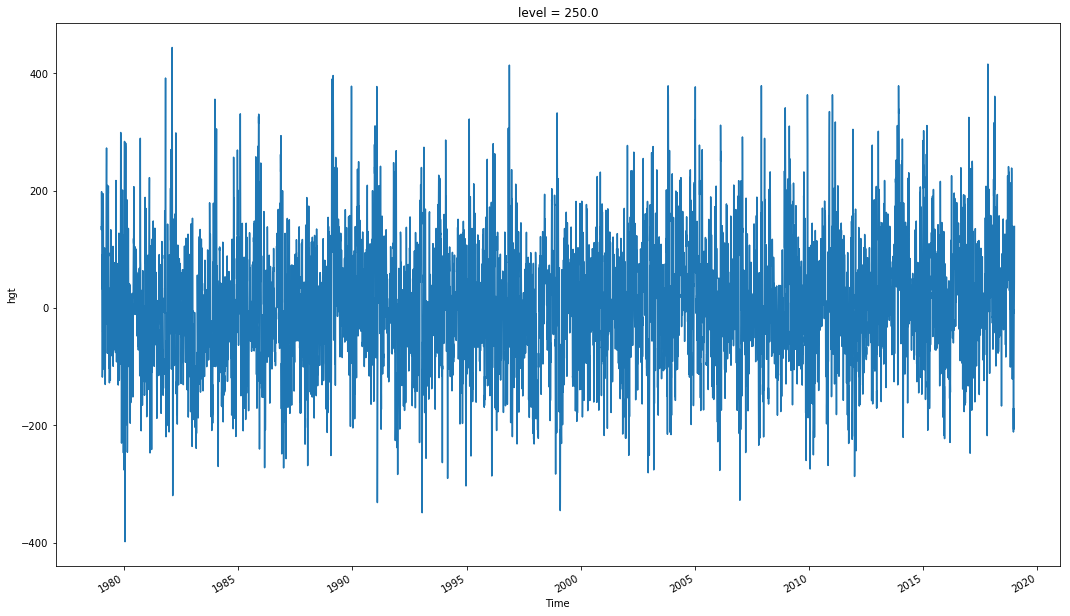

In [59]:
plt.figure(figsize=(18, 10))
hgt_anom.mean(['lon', 'lat']).sel(level=250).hgt.plot()

# Alaska High Latitudes

In [8]:
params = {
    'pressure_level': 500,
    'year': range(1979, 2019),
    'area': '75/185/50/225'
}
    
pool = mp.Pool(2)
hgt, hgt_mean = pool.starmap(load, [
    ['pressure/hgt', False], 
    ['pressure/hgt', True],
])

/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Creating long-term mean timeseries of pressure/hgt.day
Combining data from years for pressure/hgt


In [10]:
hgt_anom = hgt - hgt_mean

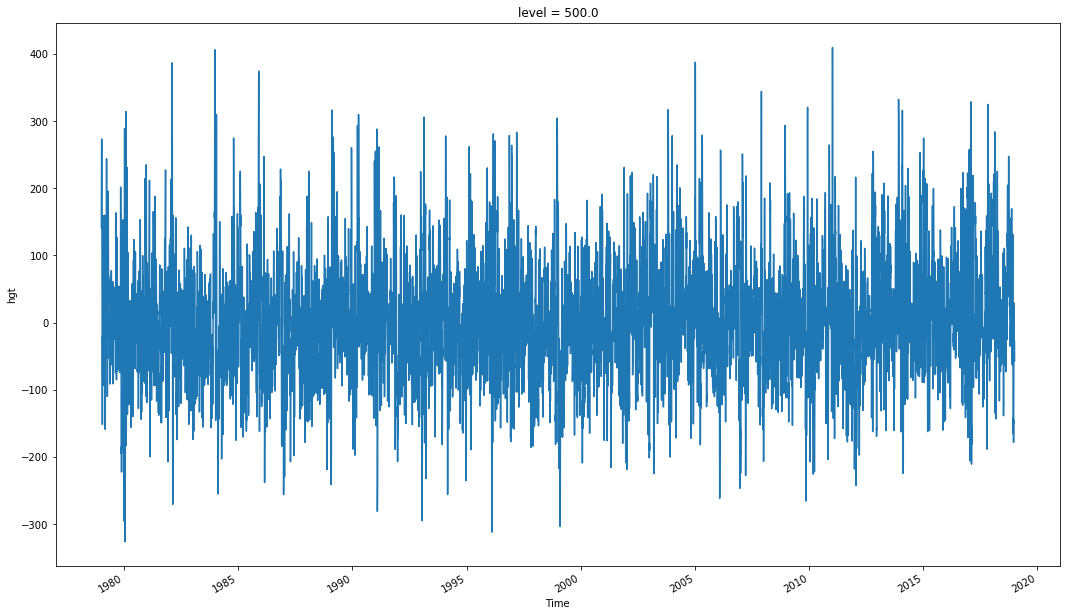

In [11]:
plt.figure(figsize=(18, 10))
hgt_anom.mean(['lon', 'lat']).hgt.plot()

## FFT

(0, 2)

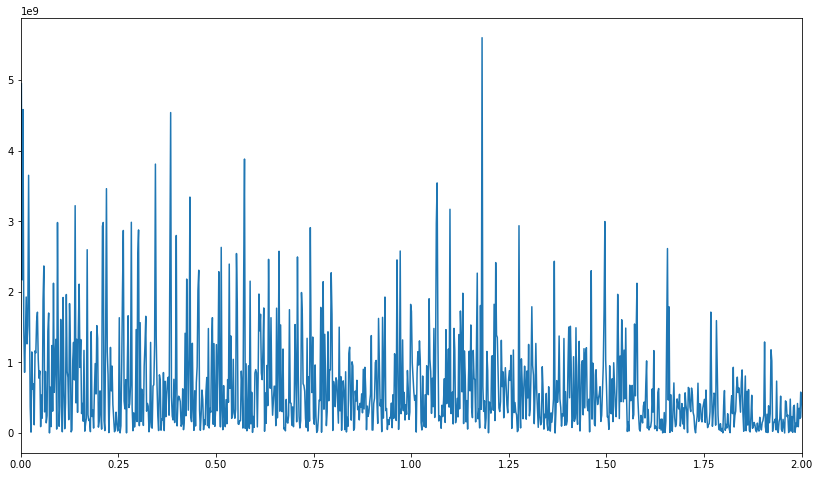

In [155]:
from scipy import fftpack
sample_freq, power = hgt_anom.mean(['lon', 'lat']).fft.power_spectrum('hgt', 1/30)

sig_fft = fftpack.fft(fft_in)
power = np.abs(sig_fft) ** 2
# power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(fft_in.size, 1/30)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.plot(sample_freq[sample_freq > 0], power[sample_freq > 0])
ax.set_xlim(0, 2)

# Subtropic latitudes

In [61]:
params = {
    'pressure_level': 500,
    'year': range(1979, 2019),
    'area': '40/0/25/360'
}
    
pool = mp.Pool(2)
hgt, hgt_mean = pool.starmap(load, [
    ['pressure/hgt', False], 
    ['pressure/hgt', True],
])

/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Creating long-term mean timeseries of pressure/hgt.day
Combining data from years for pressure/hgt


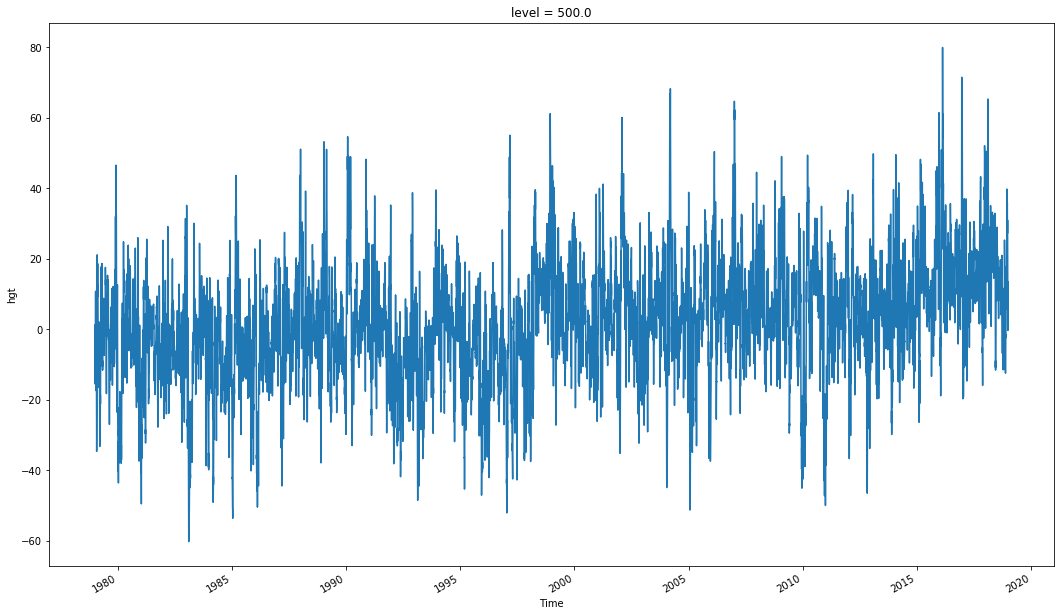

In [65]:
hgt_anom = hgt - hgt_mean
plt.figure(figsize=(18, 10))
hgt_anom.mean(['lon', 'lat']).hgt.plot()

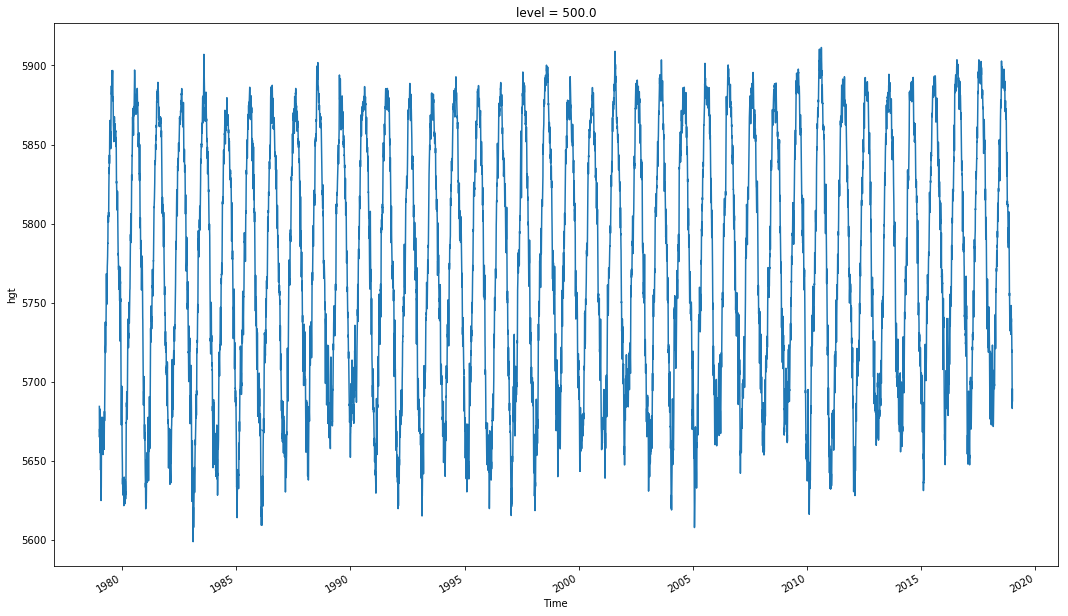

In [66]:
plt.figure(figsize=(18, 10))
hgt.mean(['lon', 'lat']).hgt.plot()